In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import beta

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("betas.csv", header=None)

In [5]:
def beta_pdf(a, b):
    """ beta probabilisty distribution """
    def _pdf(x):
        return x**(a-1)*(1-x)**(b-1)/beta(a,b)
    return _pdf

This is histogram and beta(2, 5) distribution for sampling using random-fu `beta` function

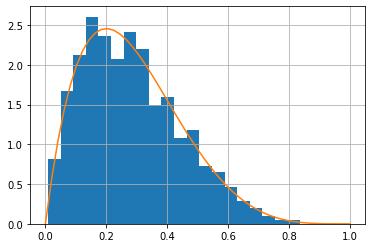

In [6]:
df[0].hist(density=True, bins=20)
xs = np.linspace(0, 1)
plt.plot(xs, [beta_pdf(2, 5)(x) for x in xs])
plt.show()

This is histogram when times were drawn using method described in the problem specification:

<AxesSubplot:>

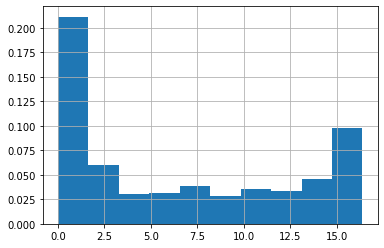

In [8]:
df[1].hist(density=True)

This is clearly not beta(2, 5).

Cross check that arrival times follow exponential distribution:

In [9]:
arr = pd.read_csv("arrivals.csv", header=None)

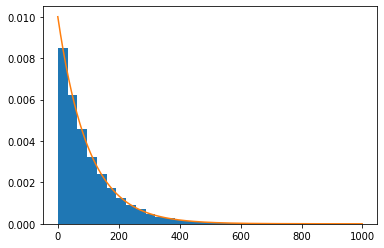

In [10]:
plt.hist(arr[0], density=True, bins=30)
plt.plot([1/100 * math.exp(-t/100) for t in range(1000)])
plt.show()

Check that shows that long continuous simulation is wrong for the Red customers.

This is large file. Use

```console
stack runghc sizes
```

In [12]:
sizes = pd.read_csv("sizes.csv")
sizes.head()

,arrival,qsize,wtime
0,17.467289,0,0.000000
1,94.816010,1,16.202774
2,105.381418,2,113.374529
3,277.339772,1,33.813962
4,343.555644,1,92.272822


<AxesSubplot:>

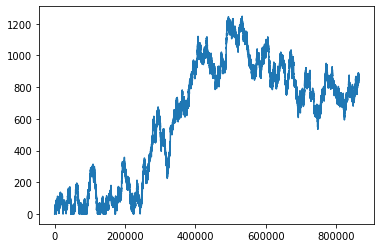

In [13]:
sizes.sort_values("arrival")["qsize"].plot()

<AxesSubplot:xlabel='qsize'>

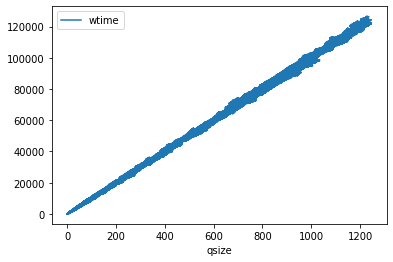

In [14]:
sizes.plot(x="qsize", y="wtime")

In [15]:
sizes["wtime"].mean()

60489.86405801894

In [16]:
sizes["wtime"].max()

126610.94749556482